In [21]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"
strong_purple = "#9E5BD5"
middle_blue = "#61BDF7"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#4569BB"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


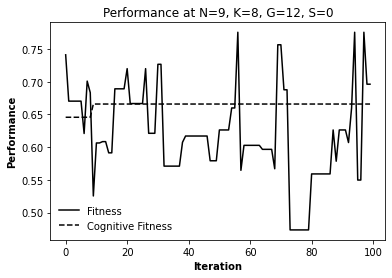

In [22]:
# Generalist Search Trajectory
import numpy as np
from Landscape import Landscape
from Agent import Agent
np.random.seed(1000)
search_iteration = 100
N = 9
K = 8
state_num = 4
generalist_expertise = 12
specialist_expertise = 0
landscape = Landscape(N=N, K=K, state_num=state_num, alpha=0.5)
# landscape.describe()
generalist = Agent(N=N, landscape=landscape, state_num=state_num,
                generalist_expertise=generalist_expertise, specialist_expertise=specialist_expertise)
# agent.describe()
G_trajectory = []
for _ in range(search_iteration):
    generalist.search()
    position = [int(i) for i in generalist.state]
    G_trajectory.append(position)

import matplotlib.pyplot as plt
x = range(len(generalist.fitness_across_time))
plt.plot(x, generalist.fitness_across_time, "k-", label="Fitness")
plt.plot(x, generalist.cog_fitness_across_time, "k--", label="Cognitive Fitness")
plt.title('Performance at N={0}, K={1}, G={2}, S={3}'.format(N, K, generalist_expertise, specialist_expertise))
plt.xlabel('Iteration', fontweight='bold', fontsize=10)
plt.ylabel('Performance', fontweight='bold', fontsize=10)
# plt.xticks(x)
plt.legend(frameon=False, fontsize=10)
plt.savefig("G_performance_K_{0}.png".format(K), transparent=True, dpi=200)
plt.show()

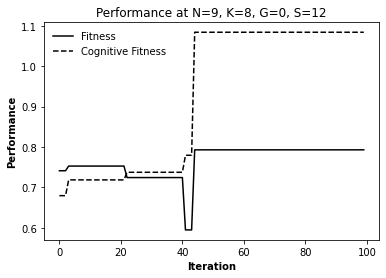

In [23]:
# Specialist Search Trajecory
import numpy as np
from Landscape import Landscape
from Agent import Agent
np.random.seed(1000)
search_iteration = 100
N = 9
K = 8
state_num = 4
generalist_expertise = 0
specialist_expertise = 12
landscape = Landscape(N=N, K=K, state_num=state_num, alpha=0.5)
# landscape.describe()
specialist = Agent(N=N, landscape=landscape, state_num=state_num,
                generalist_expertise=generalist_expertise, specialist_expertise=specialist_expertise)
# agent.describe()
S_trajectory = []
for _ in range(search_iteration):
    specialist.search()
    position = [int(i) for i in specialist.state]
    S_trajectory.append(position)

import matplotlib.pyplot as plt
x = range(len(specialist.fitness_across_time))
plt.plot(x, specialist.fitness_across_time, "k-", label="Fitness")
plt.plot(x, specialist.cog_fitness_across_time, "k--", label="Cognitive Fitness")
plt.title('Performance at N={0}, K={1}, G={2}, S={3}'.format(N, K, generalist_expertise, specialist_expertise))
plt.xlabel('Iteration', fontweight='bold', fontsize=10)
plt.ylabel('Performance', fontweight='bold', fontsize=10)
# plt.xticks(x)
plt.legend(frameon=False, fontsize=10)
plt.savefig("S_performance_K_{0}.png".format(K), transparent=True, dpi=200)
plt.show()
# print(trajectory)

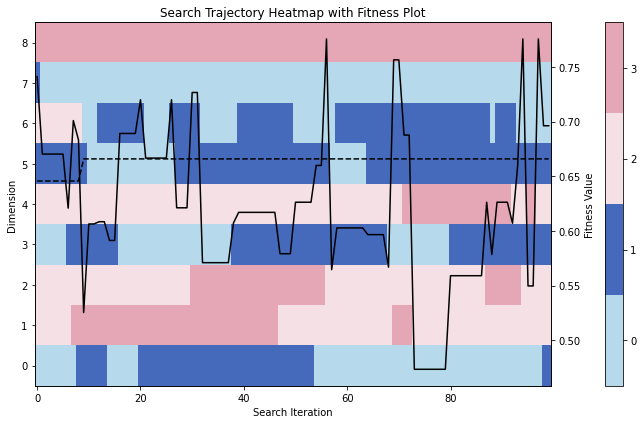

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Generate random positions and fitness values
num_positions = search_iteration
num_dimensions = N
positions = np.array(G_trajectory, dtype=int)
fitness_values = generalist.fitness_across_time
cog_fitness_values = generalist.cog_fitness_across_time

# Create a colormap for the heatmap
# cmap = cm.get_cmap('viridis', 4)  # 4 colors for values 0, 1, 2, 3
cmap = colors.ListedColormap([shallow_blue, deep_blue, shallow_pink, deep_pink])

# Create the figure and two subplots
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis with ax1

# Set aspect ratio to 'auto' for proper proportions
im = ax1.imshow(positions.T, cmap=cmap, aspect='auto', extent=[-0.5, num_positions - 0.5, -0.5, num_dimensions - 0.5])

# Plot the fitness values as a line graph on the second y-axis
ax2.plot(range(num_positions), fitness_values, color='k', label="Fitness")
plt.plot(range(num_positions), cog_fitness_values, "k--", label="Cognitive Fitness")

# Set tick labels and limits for the x-axis
# x_ticks = np.arange(0, num_positions, 5)
# ax1.set_xticks(x_ticks)
# ax1.set_xticklabels(x_ticks)

# Set tick labels and limits for the y-axis (position dimension)
y_ticks = np.arange(num_dimensions)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_ticks)
ax1.set_ylim([-0.5, num_dimensions - 0.5])

# Set tick labels and limits for the second y-axis (fitness values)
ax2.set_ylabel('Fitness Value')
# ax2.set_ylim([0, 1])

# Add colorbar
cbar = fig.colorbar(im, ax=ax2, pad=0.08)  # Adjust the pad value as needed
cbar.set_ticks([0.375, 1.125, 1.875, 2.625])  # Center the colorbar ticks
cbar.set_ticklabels(['0', '1', '2', '3'])

# Add labels and title
ax1.set_xlabel('Search Iteration')
ax1.set_ylabel('Dimension')
ax1.set_title('Search Trajectory Heatmap with Fitness Plot')
ax1.grid(visible=False)
ax2.grid(visible=False)
# Adjust spacing to accommodate the second y-axis label and colorbar
fig.tight_layout()

# Display the heatmap and fitness plot
plt.savefig("G_Heatmap_Trajectory_K_{0}.png".format(K), transparent=False, dpi=300)
plt.show()

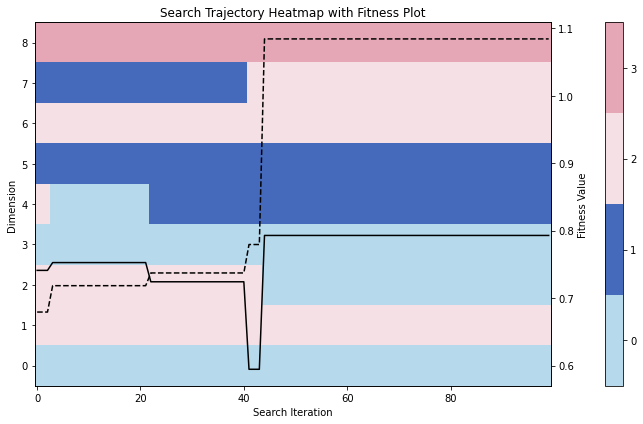

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Generate random positions and fitness values
num_positions = search_iteration
num_dimensions = N
positions = np.array(S_trajectory, dtype=int)
fitness_values = specialist.fitness_across_time
cog_fitness_values = specialist.cog_fitness_across_time

# Create a colormap for the heatmap
# cmap = cm.get_cmap('viridis', 4)  # 4 colors for values 0, 1, 2, 3
cmap = colors.ListedColormap([shallow_blue, deep_blue, shallow_pink, deep_pink])

# Create the figure and two subplots
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a twin Axes sharing the x-axis with ax1

# Set aspect ratio to 'auto' for proper proportions
im = ax1.imshow(positions.T, cmap=cmap, aspect='auto', extent=[-0.5, num_positions - 0.5, -0.5, num_dimensions - 0.5])

# Plot the fitness values as a line graph on the second y-axis
ax2.plot(range(num_positions), fitness_values, color='k', label="Fitness")
plt.plot(range(num_positions), cog_fitness_values, "k--", label="Cognitive Fitness")

# Set tick labels and limits for the x-axis
# x_ticks = np.arange(0, num_positions, 5)
# ax1.set_xticks(x_ticks)
# ax1.set_xticklabels(x_ticks)

# Set tick labels and limits for the y-axis (position dimension)
y_ticks = np.arange(num_dimensions)
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_ticks)
ax1.set_ylim([-0.5, num_dimensions - 0.5])

# Set tick labels and limits for the second y-axis (fitness values)
ax2.set_ylabel('Fitness Value')
# ax2.set_ylim([0, 1])

# Add colorbar
cbar = fig.colorbar(im, ax=ax2, pad=0.08)  # Adjust the pad value as needed
cbar.set_ticks([0.375, 1.125, 1.875, 2.625])  # Center the colorbar ticks
cbar.set_ticklabels(['0', '1', '2', '3'])

# Add labels and title
ax1.set_xlabel('Search Iteration')
ax1.set_ylabel('Dimension')
ax1.set_title('Search Trajectory Heatmap with Fitness Plot')
ax1.grid(visible=False)
ax2.grid(visible=False)
# Adjust spacing to accommodate the second y-axis label and colorbar
fig.tight_layout()

# Display the heatmap and fitness plot
plt.savefig("S_Heatmap_Trajectory_K_{0}.png".format(K), transparent=False, dpi=300)
plt.show()
